匯入模組

In [2]:
# Importing the required libraries
from ultralytics import YOLO
import squarify
import matplotlib.pyplot as plt
import cv2
import os
import random
import pandas as pd
import matplotlib.image as mpimg
import seaborn as sns
import torch

sns.set_style('darkgrid')

%matplotlib inline

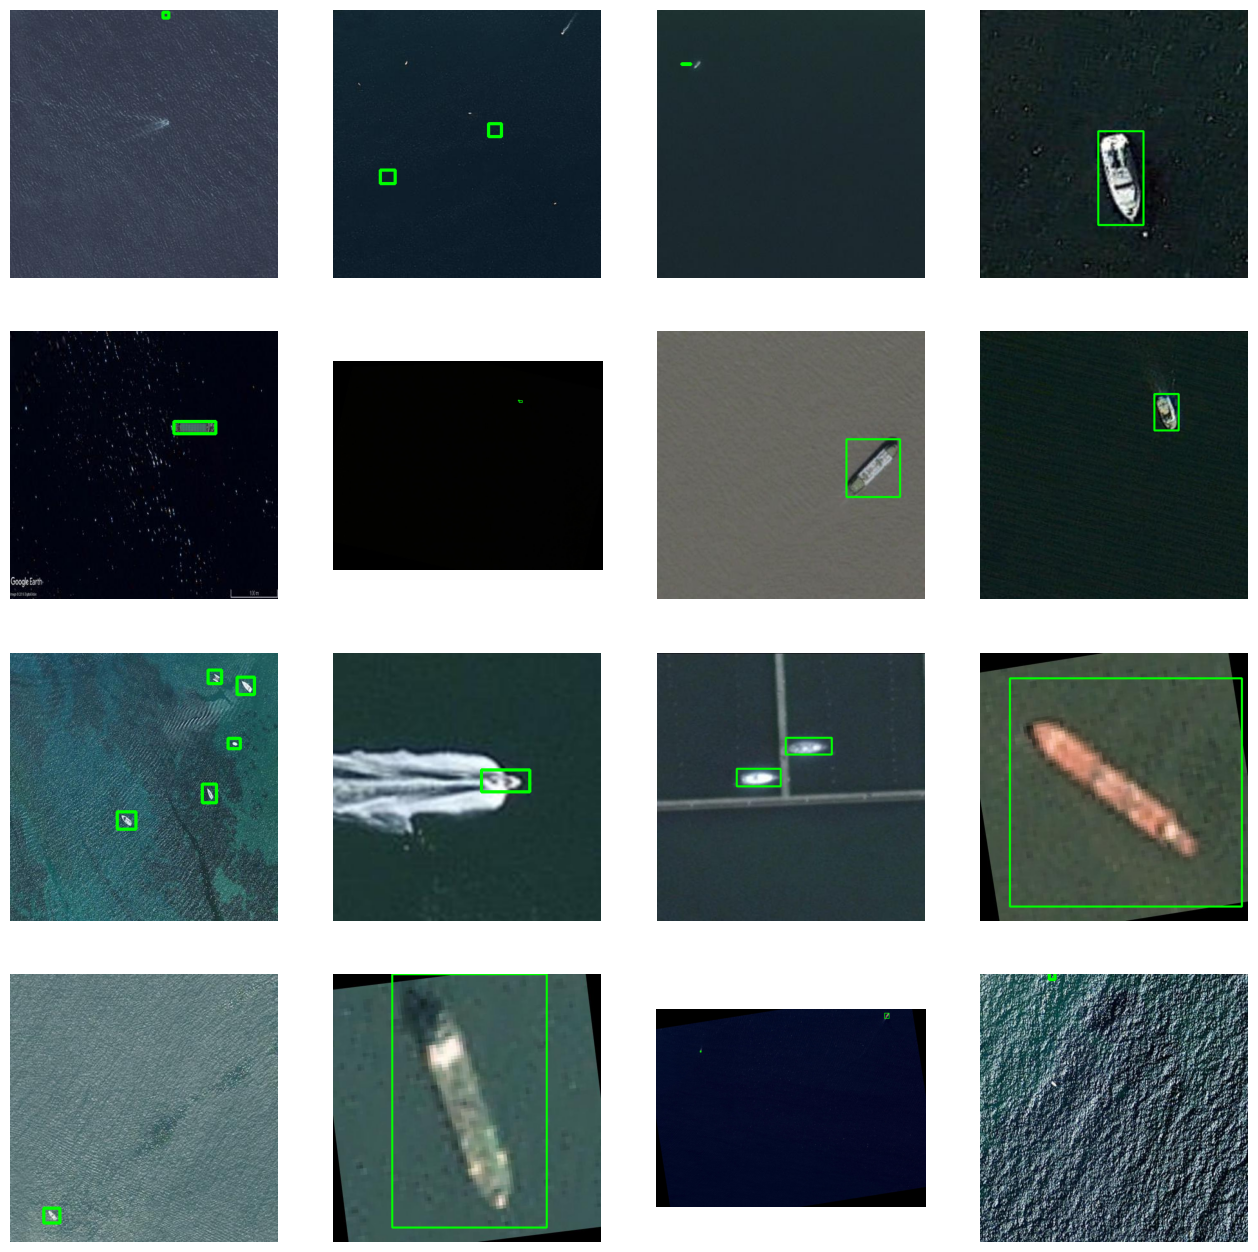

In [3]:
# Define the paths to the images and labels directories
# 定義圖像和標籤目錄的路徑
train_images = "./ships-aerial-images/train/images"
train_labels = "./ships-aerial-images/train/labels"

test_images = "./ships-aerial-images/test/images"
test_labels = "./ships-aerial-images/test/labels"

val_images = "./ships-aerial-images/valid/images"
val_labels = "./ships-aerial-images/valid/labels"

# Get a list of all the image files in the training images directory
# 獲取訓練圖像目錄中所有圖像文件的列表
image_files = os.listdir(train_images)

# Choose 16 random image files from the list#
# 從列表中選擇16個隨機圖像文件
random_images = random.sample(image_files, 16)

# Set up the plot
# 設置圖表
fig, axs = plt.subplots(4, 4, figsize=(16, 16))

# Loop over the random images and plot the object detections
# 循環遍歷隨機圖像並繪製對象檢測
for i, image_file in enumerate(random_images):
    row = i // 4
    col = i % 4
    
    # Load the image
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)

    # Load the labels for this image
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)
    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")

    # Loop over the labels and plot the object detections
    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width/2) * image.shape[1])
        y_min = int((y_center - height/2) * image.shape[0])
        x_max = int((x_center + width/2) * image.shape[1])
        y_max = int((y_center + height/2) * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)


    # Show the image with the object detections
    axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[row, col].axis('off')

plt.show()

In [4]:
# Load an image using OpenCV
image = cv2.imread("./ships-aerial-images/train/images/0__20150830_000652_1_0b07__-122-32492556715802_37-720904774415736_png.rf.19ac6f07d107c896763426fd691b8378.jpg")

# Get the size of the image
height, width, channels = image.shape
print(f"The image has dimensions {width}x{height} and {channels} channels.")

The image has dimensions 80x80 and 3 channels.


In [9]:
 # Loading a pretrained model
model = YOLO('yolov8n.pt')

# free up GPU memory
torch.cuda.empty_cache()

# Training the model
model.train(data = './ships-aerial-images/data.yaml',
            epochs = 5,
            imgsz = (height, width, channels),
            seed = 42,
            batch = 1,
            workers = 4)

New https://pypi.org/project/ultralytics/8.3.57 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.21  Python-3.11.10 torch-2.5.0+cpu CPU (11th Gen Intel Core(TM) i5-1135G7 2.40GHz)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=./ships-aerial-images/data.yaml, epochs=5, time=None, patience=100, batch=1, imgsz=(80, 80, 3), save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=N

train: Scanning C:\科展程式\ships-aerial-images\train\labels... 9697 images, 351 backgrounds, 2 corrupt: 100%|██████████| 9697/9697 [00:29<00:00, 330.75it/s]

train: WARNING  C:\\ships-aerial-images\train\images\1__20180714_180427_1029__-118-20071740708637_33-73029905538088_png.rf.330efa80ecbf49d6ceac7071288d64b4.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [1.0248994]
train: WARNING  C:\\ships-aerial-images\train\images\1__20180714_180427_1029__-118-21100741654266_33-732092454738826_png.rf.7243f2b58b505e51950850f4b26081ba.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [1.0078689]


train: New cache created: C:\\ships-aerial-images\train\labels.cache
WARNING  Box and segment counts should be equal, but got len(segments) = 709, len(boxes) = 19454. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


val: Scanning C:\科展程式\ships-aerial-images\valid\labels... 2165 images, 68 backgrounds, 0 corrupt: 100%|██████████| 2165/2165 [00:06<00:00, 352.90it/s]


val: New cache created: C:\\ships-aerial-images\valid\labels.cache
WARNING  Box and segment counts should be equal, but got len(segments) = 172, len(boxes) = 3720. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to runs\detect\train5\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 96 train, 96 val
Using 0 dataloader workers
Logging results to runs\detect\train5
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G      1.534      1.433     0.9066          5         96: 100%|██████████| 9695/9695 [09:41<00:00, 16.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1083/1083 [00:41<00:00, 26.30it/s]


                   all       2165       3720      0.233      0.132     0.0599     0.0252

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G      1.504      1.304     0.8851          1         96: 100%|██████████| 9695/9695 [08:59<00:00, 17.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1083/1083 [00:45<00:00, 23.66it/s]


                   all       2165       3720      0.212      0.163      0.061     0.0232

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G      1.433      1.234     0.8618          0         96: 100%|██████████| 9695/9695 [08:57<00:00, 18.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1083/1083 [00:48<00:00, 22.50it/s]


                   all       2165       3720       0.19       0.18     0.0533     0.0218

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G      1.382      1.156     0.8351          1         96: 100%|██████████| 9695/9695 [09:05<00:00, 17.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1083/1083 [00:46<00:00, 23.10it/s]


                   all       2165       3720      0.301      0.194      0.104     0.0441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G      1.313      1.092     0.8198          0         96: 100%|██████████| 9695/9695 [09:29<00:00, 17.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1083/1083 [00:44<00:00, 24.58it/s]

                   all       2165       3720      0.363      0.207      0.125     0.0568



5 epochs completed in 0.835 hours.
Optimizer stripped from runs\detect\train5\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train5\weights\best.pt, 6.2MB

Validating runs\detect\train5\weights\best.pt...
Ultralytics 8.3.21  Python-3.11.10 torch-2.5.0+cpu CPU (11th Gen Intel Core(TM) i5-1135G7 2.40GHz)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1083/1083 [00:44<00:00, 24.13it/s]


                   all       2165       3720      0.363      0.207      0.128     0.0579
Speed: 0.1ms preprocess, 14.6ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs\detect\train5


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x00000297FE1AC750>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

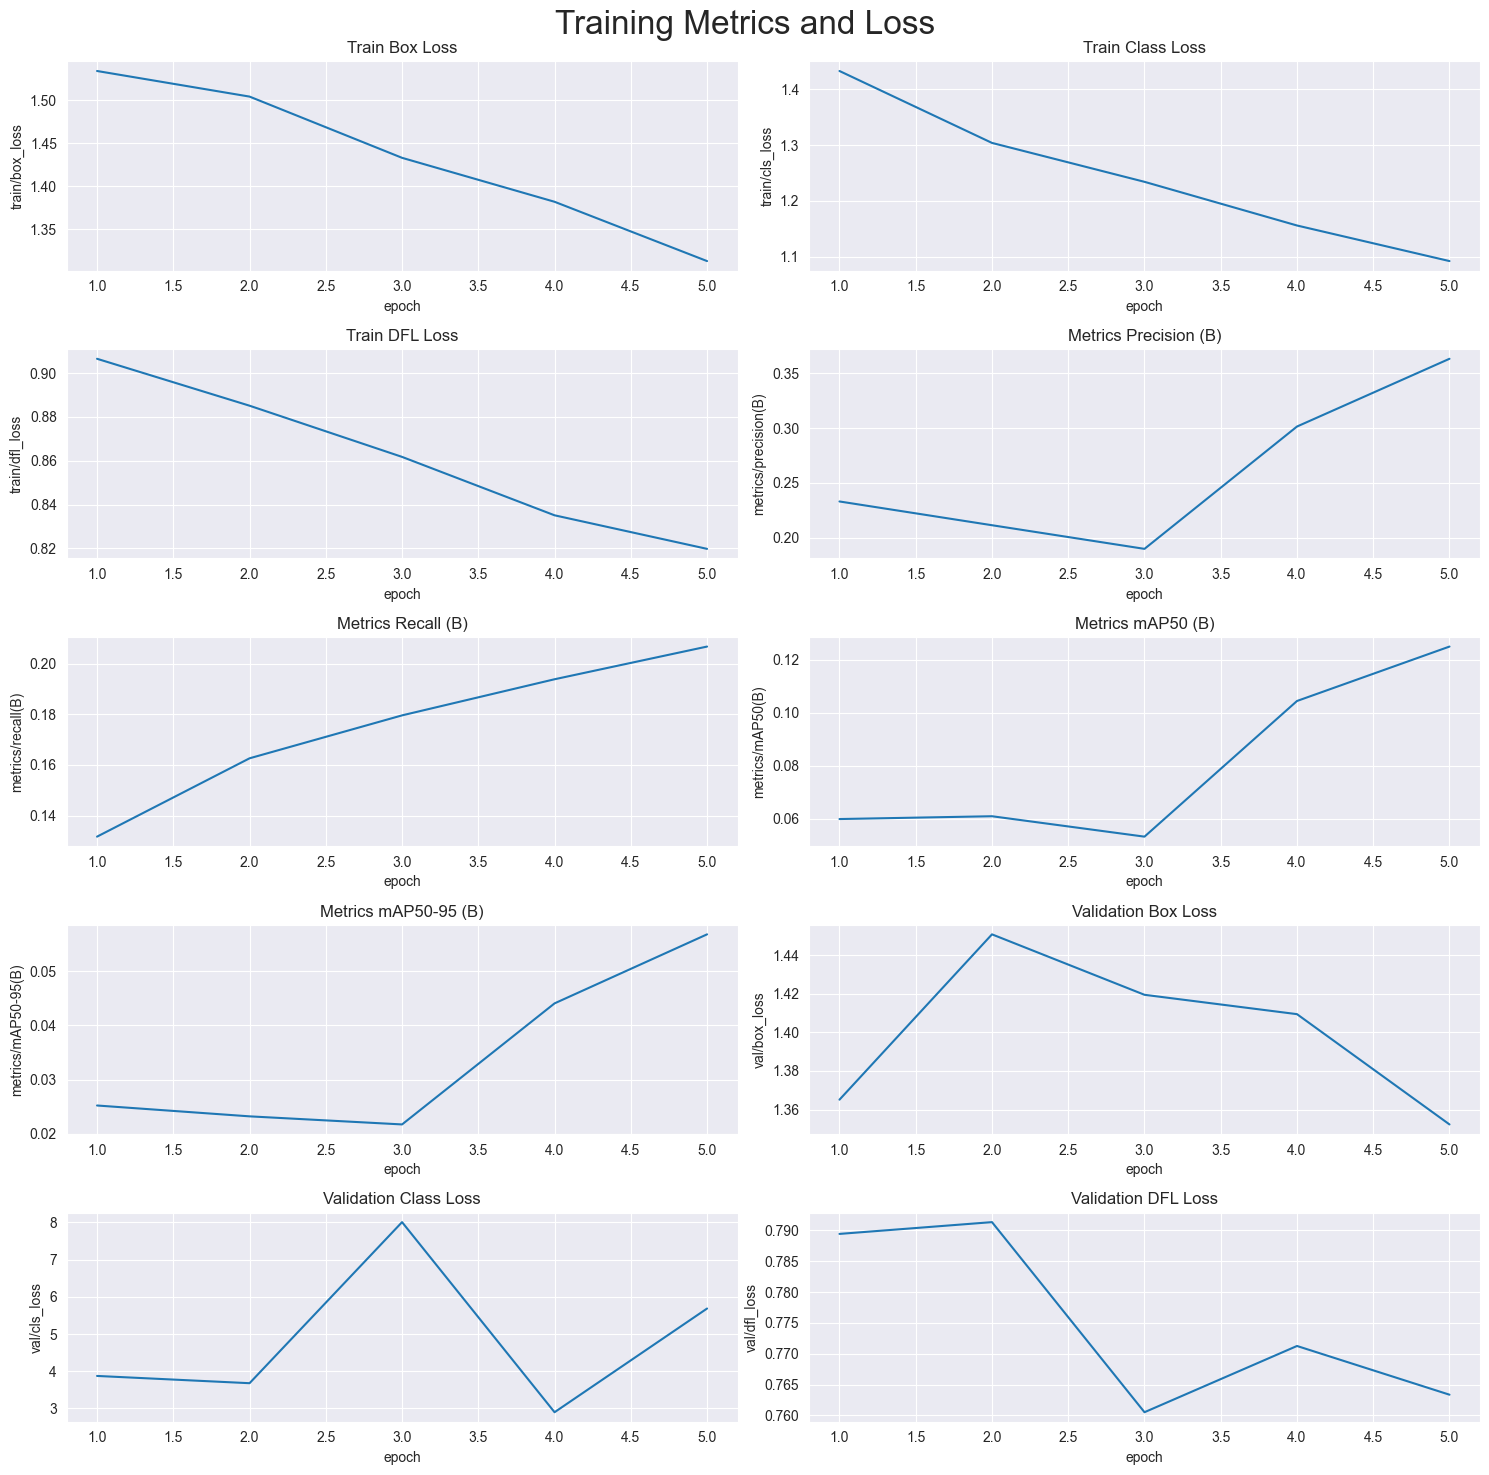

In [11]:
%matplotlib inline
# read in the results.csv file as a pandas dataframe
# 將results.csv文件讀取為pandas數據幀
df = pd.read_csv('./runs/detect/train/results.csv')
df.columns = df.columns.str.strip()

# create subplots using seaborn
# 使用seaborn創建子圖
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# plot the columns using seaborn
# 使用seaborn繪製列
sns.lineplot(x='epoch', y='train/box_loss', data=df, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=df, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=df, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=df, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=df, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=df, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=df, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=df, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=df, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=df, ax=axs[4,1])

# set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

# add suptitle and subheader
plt.suptitle('Training Metrics and Loss', fontsize=24)

# adjust top margin to make space for suptitle
plt.subplots_adjust(top=0.8)

# adjust spacing between subplots
plt.tight_layout()

plt.show()

In [ ]:
%matplotlib inline
# Loading the best performing model
model = YOLO('./runs/detect/train/weights/best.pt')

# Evaluating the model on the test dataset
# 在測試數據集上評估模型
metrics = model.val(conf = 0.25, split = 'test')

Ultralytics 8.3.21  Python-3.11.10 torch-2.5.0+cpu CPU (11th Gen Intel Core(TM) i5-1135G7 2.40GHz)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning C:\科展程式\ships-aerial-images\test\labels... 1573 images, 51 backgrounds, 0 corrupt: 100%|██████████| 1573/1573 [00:04<00:00, 323.39it/s]


val: New cache created: C:\\ships-aerial-images\test\labels.cache
WARNING  Box and segment counts should be equal, but got len(segments) = 106, len(boxes) = 2872. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:13<00:00,  7.58it/s]


                   all       1573       2872      0.692      0.148      0.404       0.23
Speed: 0.1ms preprocess, 3.5ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to runs\detect\val


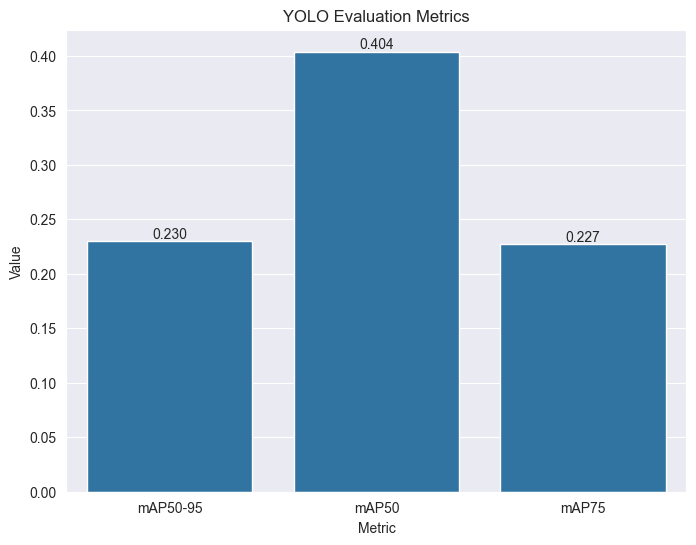

In [4]:
%matplotlib inline
# Create the barplot
ax = sns.barplot(x=['mAP50-95', 'mAP50', 'mAP75'], y=[metrics.box.map, metrics.box.map50, metrics.box.map75])

# Set the title and axis labels
ax.set_title('YOLO Evaluation Metrics')
ax.set_xlabel('Metric')
ax.set_ylabel('Value')

# Set the figure size
fig = plt.gcf()
fig.set_size_inches(8, 6)

# Add the values on top of the bars
# 在條形上方添加值
for p in ax.patches:
    ax.annotate('{:.3f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
    
# Show the plot
plt.show()


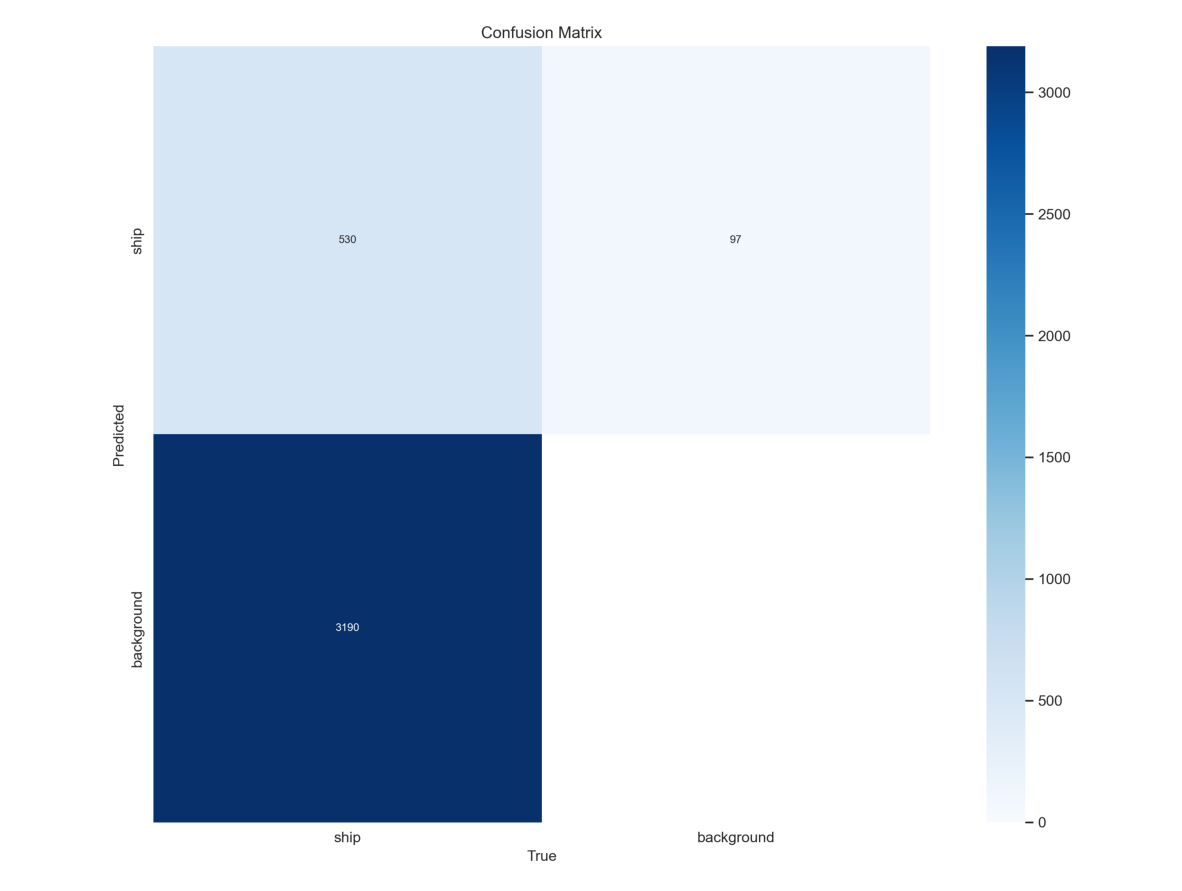

In [5]:
%matplotlib inline
# Reading the confusion matrix image file
img = mpimg.imread('./runs/detect/train/confusion_matrix.png')

# Plotting the confusion matrix image
fig, ax = plt.subplots(figsize = (15, 15))

ax.imshow(img)
ax.axis('off'); # 逗號表示不顯示軸

In [6]:
# Function to perform ship detections
def ship_detect(img_path):
    
    # Read the image
    img = cv2.imread(img_path)

    # Pass the image through the detection model and get the result
    detect_result = model(img)

    # Plot the detections
    detect_img = detect_result[0].plot()
    
    # Convert the image to RGB format
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)
    
    return detect_img


0: 96x96 1 ship, 184.5ms
Speed: 47.1ms preprocess, 184.5ms inference, 26.0ms postprocess per image at shape (1, 3, 96, 96)

0: 96x96 (no detections), 10.0ms
Speed: 1.0ms preprocess, 10.0ms inference, 1.0ms postprocess per image at shape (1, 3, 96, 96)

0: 96x96 1 ship, 11.0ms
Speed: 0.0ms preprocess, 11.0ms inference, 1.0ms postprocess per image at shape (1, 3, 96, 96)

0: 96x96 (no detections), 9.2ms
Speed: 1.0ms preprocess, 9.2ms inference, 0.0ms postprocess per image at shape (1, 3, 96, 96)

0: 96x96 1 ship, 7.5ms
Speed: 1.3ms preprocess, 7.5ms inference, 0.0ms postprocess per image at shape (1, 3, 96, 96)

0: 96x96 (no detections), 7.3ms
Speed: 1.5ms preprocess, 7.3ms inference, 0.0ms postprocess per image at shape (1, 3, 96, 96)

0: 96x96 (no detections), 8.1ms
Speed: 1.2ms preprocess, 8.1ms inference, 1.0ms postprocess per image at shape (1, 3, 96, 96)

0: 96x96 (no detections), 8.0ms
Speed: 0.0ms preprocess, 8.0ms inference, 1.0ms postprocess per image at shape (1, 3, 96, 96)



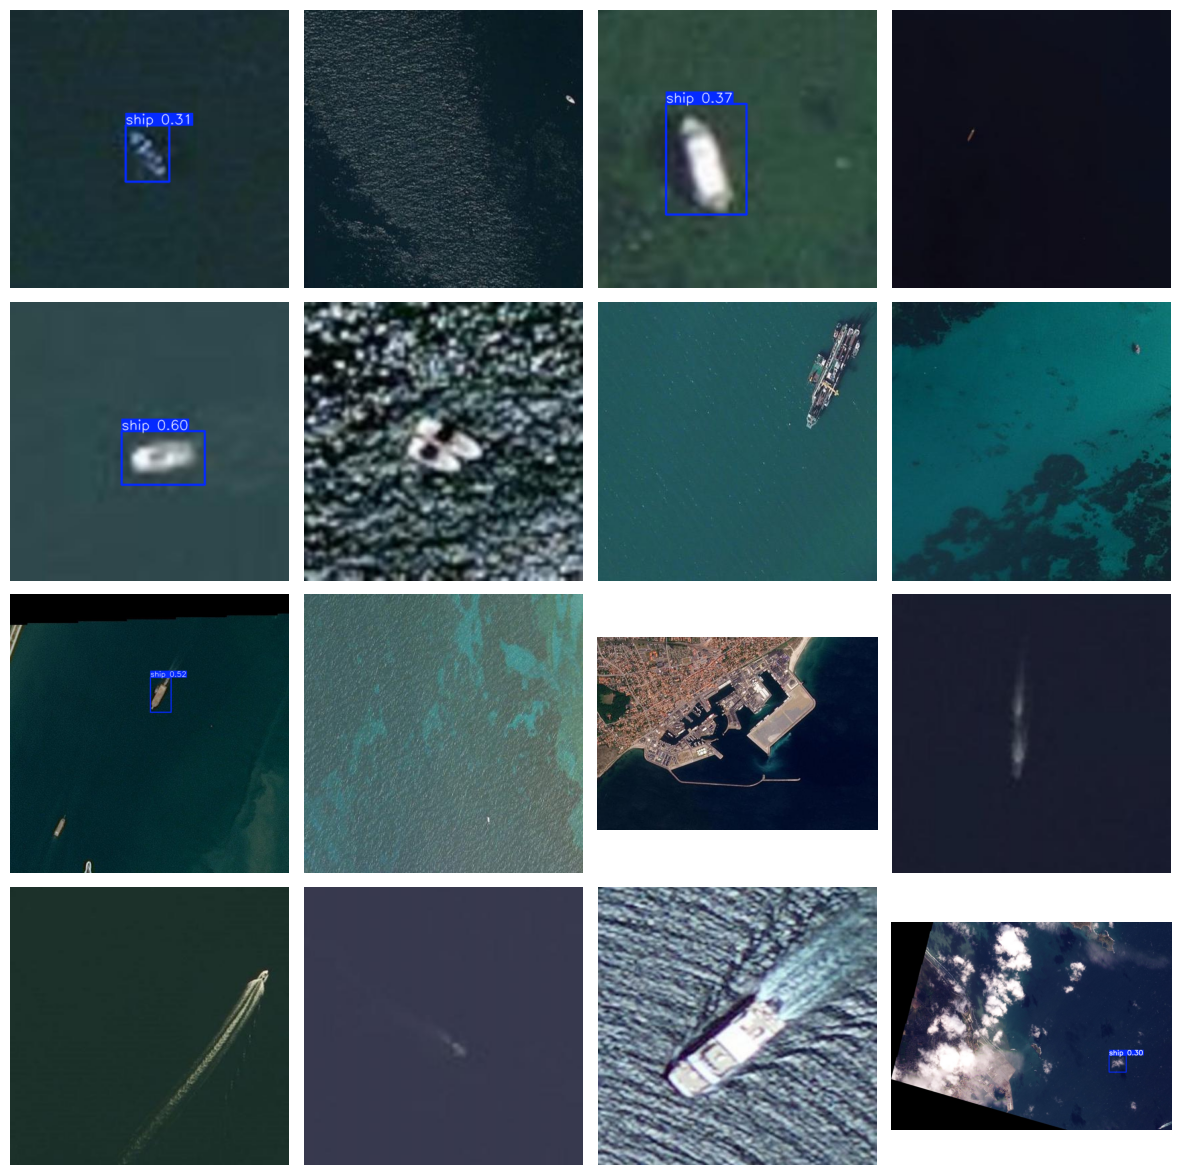

In [ ]:
import random

# Define the directory where the custom images are stored
# 
custom_image_dir = './ships-aerial-images/test/images'

# Get the list of image files in the directory
image_files = os.listdir(custom_image_dir)

# Select 16 random images from the list
#selected_images = random.sample(image_files, 16)

# Create a figure with subplots for each image
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

# Iterate over the selected images and plot each one
for i, img_file in enumerate(selected_images):
        
    # Compute the row and column index of the current subplot
    row_idx = i // 4
    col_idx = i % 4
    
    # Load the current image and run object detection
    img_path = os.path.join(custom_image_dir, img_file)
    detect_img = ship_detect(img_path)
    
    # Plot the current image on the appropriate subplot
    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05)

In [9]:
from ultralytics import YOLO

# Load a model
model = YOLO("./runs/detect/train/weights/best.pt")

# Predict with the model
results = model.predict('test.png',save=True)  # predict on an image


image 1/1 c:\\test.png: 64x96 (no detections), 106.5ms
Speed: 24.9ms preprocess, 106.5ms inference, 9.8ms postprocess per image at shape (1, 3, 64, 96)
Results saved to runs\detect\predict
